### Loading the dataset

In [114]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go

In [115]:
df = pd.read_csv("~/Desktop/iris.data")

In [116]:
# checking shape of dataset
df.shape

(149, 5)

In [117]:
# visualizing dataset
df.head()
# the column names are missing and also the existing column is a part of the data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [118]:
temp = df.columns # stroring 1st column in temp

df.rename(columns = {'5.1':'SepalLength','3.5':'SepalWidth','1.4':'PetalLength','0.2':'PetalWidth',
                    'Iris-setosa':'Class'}, inplace = True) # renaming column to respective column names

# adding temp's value as a new row in df
new_row = {'SepalLength': temp[0], 'SepalWidth': temp[1], 
           'PetalLength': temp[2], 'PetalWidth': temp[3], 'Class': temp[4]}

#appending row to the dataframe
df = df.append(new_row, ignore_index = True)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### Pre-processing and basic EDA

In [119]:
# checking datatype and null values
df.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SepalLength  150 non-null    object
 1   SepalWidth   150 non-null    object
 2   PetalLength  150 non-null    object
 3   PetalWidth   150 non-null    object
 4   Class        150 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


In [120]:
# changing datatypes to float type
df['SepalLength'] = df['SepalLength'].astype(np.float64)
df['SepalWidth'] = df['SepalWidth'].astype(np.float64)
df['PetalLength'] = df['PetalLength'].astype(np.float64)
df['PetalWidth'] = df['PetalWidth'].astype(np.float64)

In [121]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [122]:
# checking class types
df['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [123]:
# visualizing distrubution of target feature
colors = ['gold', 'mediumturquoise','orange']
fig = go.Figure(data = [go.Pie(labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] ,
                             values = [len(df[df['Class'] == 'Iris-setosa']),len(df[df['Class'] == 'Iris-versicolor']),
                                       len(df[df['Class'] == 'Iris-virginica'])])])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'value', textfont_size = 22,
                  marker = dict(colors = ['gold', 'mediumturquoise'], line = dict(color='#000000', width = 4)))
fig.show()

# Conclusion: Data is balanced with respect to target feature


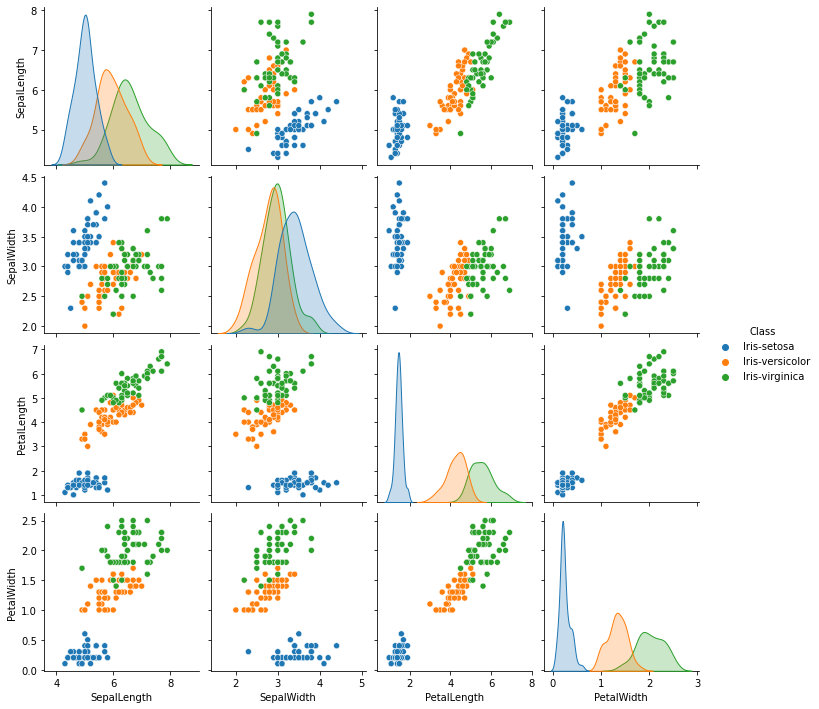

In [124]:
# pairplot of the features
sns.pairplot(df, hue = "Class")
plt.show()

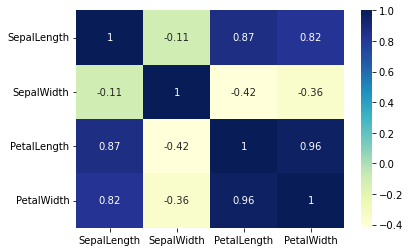

In [125]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()
# high correlation between PetalLength & PetalWidth
# high correlation between PetalLength & SepalLength

### Model Building on whole dataset

In [127]:
y = df['Class']
df.drop(['Class'], axis=1,inplace = True)
X = df

In [128]:
# splitting data to train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [129]:
modelGNB = GaussianNB()
modelGNB.fit(X_train, y_train) # fitting model
Y_pred = modelGNB.predict(X_test) # predicting test set

### Reporting Accuracy

In [130]:
accuracy = accuracy_score(y_test,Y_pred)

print('Accuracy of Gaussian Naive Bayes is: %.2f' %(accuracy*100))

Accuracy of Gaussian Naive Bayes is: 93.33


### Model Building with dropped Petal Length

In [131]:
df.drop(['PetalLength'], axis=1,inplace = True)
X = df

In [132]:
# splitting data to train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [133]:
modelGNB = GaussianNB()
modelGNB.fit(X_train, y_train) # fitting model
Y_pred = modelGNB.predict(X_test) # predicting test set

### Reporting Accuracy

In [134]:
accuracy = accuracy_score(y_test,Y_pred)

print('Accuracy of Gaussian Naive Bayes is: %.2f' %(accuracy*100))

Accuracy of Gaussian Naive Bayes is: 91.11


In [135]:
# Model on entire dataset gave better accuracy so its not required to drop petal length